In [2]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

from utils.utilities import *

In [3]:
train = pd.read_csv('./data/fashion-mnist_train.csv')
test = pd.read_csv('./data/fashion-mnist_test.csv')

In [4]:
print("Training set (images) shape: {shape}".format(shape=train.shape))
print("Testing set (images) shape: {shape}".format(shape=test.shape))

Training set (images) shape: (60000, 785)
Testing set (images) shape: (10000, 785)


In [5]:
ytrain = train.label.as_matrix()
ytrain = one_hot(ytrain,num_classes = 10)
Xtrain = train.drop('label', axis=1).as_matrix()
Xtrain = Xtrain.reshape(-1,28,28,1)/255
ytest = test.label.as_matrix()
ytest = one_hot(ytest, num_classes = 10)
Xtest = test.drop('label', axis=1).as_matrix()
Xtest = Xtest.reshape(-1,28,28,1)/255

In [6]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=Xtrain.shape))
print("Training set (labels) shape: {shape}".format(shape=ytrain.shape))

# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=Xtest.shape))
print("Training set (labels) shape: {shape}".format(shape=ytest.shape))

Training set (images) shape: (60000, 28, 28, 1)
Training set (labels) shape: (60000, 10)
Training set (images) shape: (10000, 28, 28, 1)
Training set (labels) shape: (10000, 10)


In [7]:
# Create dictionary of target classes
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

Text(0.5,1,'(Label: T-shirt/top)')

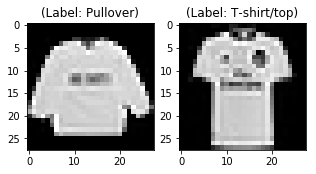

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = Xtrain[0,:,:,0]
curr_lbl = np.argmax(ytrain[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = Xtest[0,:,:,0]
curr_lbl = np.argmax(ytest[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(Xtrain, ytrain, test_size = 0.1, random_state = 12345)


In [10]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=X_train.shape))
print("Training set (labels) shape: {shape}".format(shape=y_train.shape))

# Shapes of validation set
print("Training set (images) shape: {shape}".format(shape=X_validate.shape))
print("Training set (labels) shape: {shape}".format(shape=y_validate.shape))

Training set (images) shape: (54000, 28, 28, 1)
Training set (labels) shape: (54000, 10)
Training set (images) shape: (6000, 28, 28, 1)
Training set (labels) shape: (6000, 10)


In [11]:
image_height = 28
image_width = 28
num_channels = 1
num_classes = 10

learning_rate = 0.0001

graph = tf.Graph()
with graph.as_default():
    #Define the placeholders
    with tf.name_scope("graph_inputs"):
        # input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
        X = tf.placeholder(dtype=tf.float32,shape=[None, image_height, image_width, num_channels], name="input_placeholder")
        y = tf.placeholder(dtype=tf.float32,shape=[None, num_classes],name="input_placeholder")
        training = tf.placeholder_with_default(False, shape=[], name='training')
        
    #Define the model
    with tf.name_scope("CNN"):
        with tf.name_scope("Model"):
            with tf.name_scope('conv_1'):
                #Layer 1
                conv1 = tf.layers.conv2d(X, filters = 32, kernel_size=[5,5], strides=[1,1], padding = "VALID", activation=tf.nn.relu)
                #shape=(batch_size, 24, 24, 32)
                
            with tf.name_scope('conv_2'):
                #Layer 2
                conv2 = tf.layers.conv2d(conv1, filters = 32, kernel_size=[5,5], strides=[1,1], padding = "VALID", activation=tf.nn.relu)
                #shape=(batch_size, 20, 20, 32)
                MaxPool1 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], strides=[2,2], padding='VALID')
                #shape = (batch_size, 10, 10, 32)
                conv2_dropout = tf.layers.dropout(MaxPool1, rate=0.25, training=training)

            with tf.name_scope('conv_2'):
                #Layer 1
                conv3 = tf.layers.conv2d(conv2_dropout, filters = 64, kernel_size=[3,3], strides=[1,1], padding = "VALID", activation=tf.nn.relu)
                #shape=(batch_size, 8, 8, 64)
                
            with tf.name_scope('conv_2'):
                #Layer 2
                conv4 = tf.layers.conv2d(conv3, filters = 64, kernel_size=[3,3], strides=[1,1], padding = "VALID", activation=tf.nn.relu)
                #shape=(batch_size, 6, 6, 64)
                MaxPool2 = tf.layers.max_pooling2d(inputs=conv4, pool_size=[2,2], strides=[2,2], padding='VALID')
                #shape = (batch_size, 3, 3, 64)
                conv4_dropout = tf.layers.dropout(MaxPool2, rate=0.25, training=training)
                
            with tf.name_scope('dense_1'):
                flat1 = tf.layers.flatten(conv4_dropout)
                #shape=(batch_size, 576)
                dense1 = tf.layers.dense(inputs = flat1, units = 32, activation=tf.nn.relu)
                #shape=(batch_size, 32)

        with tf.variable_scope('Logits'):
            # Reduce the dimensions to num_classes
            logits = tf.layers.dense(inputs = dense1, units = 10)
            #shape=(batch_size, 10)
        with tf.name_scope('Predictions'):
            #Softmax layer
            predictions = tf.nn.softmax(logits, name="predictions")  
            #shape=(batch_size, 10)
        with tf.name_scope('Loss'):
            #Classes are one-hot encoded. If they were not,
            #use tf.nn.sparse_softmax_cross_entropy_with_logits
            xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y)
            loss = tf.reduce_mean(xentropy)
        with tf.name_scope('Train'):
            optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
            trainer = optimizer.minimize(loss)
        with tf.name_scope("Accuracy"):
            accuracy, accuracy_update_op  = tf.metrics.accuracy(labels = tf.argmax(y, axis = 1), predictions = tf.argmax(predictions, axis = 1), name = 'accuracy')
            running_vars_accuracy = tf.get_collection(tf.GraphKeys.LOCAL_VARIABLES, scope="CNN/Accuracy")
        with tf.name_scope("Saver"):
            saver = tf.train.Saver(var_list=tf.trainable_variables()) 
        with tf.name_scope("init"):
            global_variables_init = tf.global_variables_initializer()
            running_vars_initializer_accuracy = tf.variables_initializer(var_list=running_vars_accuracy)

In [21]:
#TOTAL NUMBER OF PARAMETERS
total_parameters = 0
for variable in graph.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES):
# shape is an array of tf.Dimension
    shape = variable.get_shape()
    print("Size of the matrix: {}".format(shape))
    print("How many dimensions it has: {}".format(len(shape)))
    variable_parameters = 1
    for dim in shape:
        print("Dimension: {}".format(dim))
        variable_parameters *= dim.value
    print("Total number of elements in a matrix: {}".format(variable_parameters))
    print("---------------------------------------------")
    total_parameters += variable_parameters
print("Total number of parameters: {}". format(total_parameters))

Size of the matrix: (5, 5, 1, 32)
How many dimensions it has: 4
Dimension: 5
Dimension: 5
Dimension: 1
Dimension: 32
Total number of elements in a matrix: 800
---------------------------------------------
Size of the matrix: (32,)
How many dimensions it has: 1
Dimension: 32
Total number of elements in a matrix: 32
---------------------------------------------
Size of the matrix: (5, 5, 32, 32)
How many dimensions it has: 4
Dimension: 5
Dimension: 5
Dimension: 32
Dimension: 32
Total number of elements in a matrix: 25600
---------------------------------------------
Size of the matrix: (32,)
How many dimensions it has: 1
Dimension: 32
Total number of elements in a matrix: 32
---------------------------------------------
Size of the matrix: (3, 3, 32, 64)
How many dimensions it has: 4
Dimension: 3
Dimension: 3
Dimension: 32
Dimension: 64
Total number of elements in a matrix: 18432
---------------------------------------------
Size of the matrix: (64,)
How many dimensions it has: 1
Dimensi

In [12]:
#Network Parameters
num_epochs = 200
batch_size = 64

with tf.Session(graph=graph) as sess:
    global_variables_init.run()
    graph.finalize()
    
    train_loss = []
    val_loss = []
    train_acc = []
    val_acc = []
    
    for epoch in range(num_epochs):
        avg_cost_train = 0.
        total_train_batch = int((len(X_train)/(batch_size)) + 1)
            
        miniBatches_train = miniBatch(X_train, y_train, batch_size)

        running_vars_initializer_accuracy.run()
        for batch in miniBatches_train:
            xBatch_train = batch[0]
            yBatch_train = batch[1]
            
            _, miniBatchCost_train, miniBatchAccuracy_train = sess.run([trainer, loss, accuracy_update_op], feed_dict = {X: xBatch_train, y: yBatch_train, training: True})
            avg_cost_train += miniBatchCost_train / total_train_batch
        accuracy_train = sess.run(accuracy)
        train_loss.append(avg_cost_train)
        train_acc.append(accuracy_train)
        
        
        avg_cost_val = 0.
        total_val_batch = int((len(X_validate)/(batch_size)) + 1)
        miniBatches_val = miniBatch(X_validate, y_validate, batch_size)
        running_vars_initializer_accuracy.run()
        for batch in miniBatches_val:
            xBatch_val = batch[0]
            yBatch_val = batch[1]
            
            miniBatchCost_val, miniBatchAccuracy_val= sess.run([loss, accuracy_update_op], feed_dict = {X: xBatch_val, y: yBatch_val})
            avg_cost_val += miniBatchCost_val / total_val_batch
        accuracy_val = sess.run(accuracy)
        val_loss.append(avg_cost_val)
        val_acc.append(accuracy_val)
        
        
        print("Epoch: {:d}-".format(epoch), \
              "Training Loss: {:.6f}, ".format(avg_cost_train), \
              "Training Accuracy: {:>.2%}, ".format(accuracy_train), \
              "Validation Loss: {:.6f}, ".format(avg_cost_val), \
              "Validation Accuracy: {:>.2%},".format(accuracy_val))

    print("Optimization Finished!")
    
    print("Saving the model...")
    final_model_path = "./my_deep_model.ckpt"
    saver.save(sess, final_model_path)
        
    print("Evaluating on testing data...")
    Xtest = Xtest.reshape(-1,28,28,1)
    running_vars_initializer_accuracy.run()
    predictions_test, _= sess.run([predictions, accuracy_update_op], feed_dict={X:Xtest, y: ytest})
    accuracy_test = sess.run(accuracy)
    print("Final test accuracy: {:>.2%}".format(accuracy_test)) 

Epoch: 0- Training Loss: 1.023413,  Training Accuracy: 62.67%,  Validation Loss: 0.661281,  Validation Accuracy: 75.03%,
Epoch: 1- Training Loss: 0.659857,  Training Accuracy: 75.38%,  Validation Loss: 0.581287,  Validation Accuracy: 78.50%,
Epoch: 2- Training Loss: 0.587509,  Training Accuracy: 78.07%,  Validation Loss: 0.528221,  Validation Accuracy: 80.57%,
Epoch: 3- Training Loss: 0.540794,  Training Accuracy: 79.95%,  Validation Loss: 0.499704,  Validation Accuracy: 81.52%,
Epoch: 4- Training Loss: 0.501400,  Training Accuracy: 81.47%,  Validation Loss: 0.461145,  Validation Accuracy: 83.25%,
Epoch: 5- Training Loss: 0.470744,  Training Accuracy: 82.85%,  Validation Loss: 0.429210,  Validation Accuracy: 84.92%,
Epoch: 6- Training Loss: 0.443835,  Training Accuracy: 83.81%,  Validation Loss: 0.411354,  Validation Accuracy: 85.28%,
Epoch: 7- Training Loss: 0.421582,  Training Accuracy: 84.80%,  Validation Loss: 0.392616,  Validation Accuracy: 86.10%,
Epoch: 8- Training Loss: 0.40373

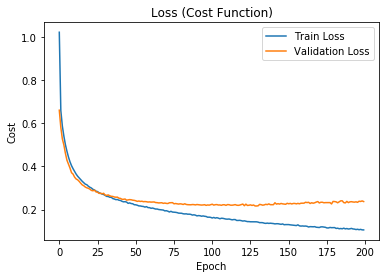

In [13]:
#Visualize the loss
plt.figure(1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Loss (Cost Function)")
plt.legend()
plt.show()

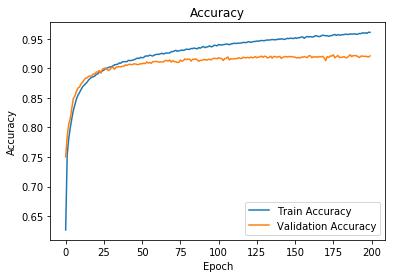

In [14]:
#Visualize the Accuracy
plt.figure(2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy")
plt.legend()
plt.show()